# GRIP: The Sparks Foundation 
# Data Science & Buisness Analytics

# Graduate Rotational Internship Program (Batch:- June 2021)
# Author: Saubiya Khan
# Task No.6: Prediction using Decision Tree Algorithm

The lris flower data set of Fisher's Iris data set is a multivariate data set. The data set consists of 150 samples from each of three species of Iris(Iris setosa-0,Iris virginica-1 and lris versicolor-2).Four features were measured from each sample the length and the width of the sepals and petals.In centimeters Based on the combination of these four features. Fisher devloped a linear discriminant model to distinguish the species from each other.

## Objective: Classify a new flower as belonging to one of the 3 classes present in data set.

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import warnings
warnings.filterwarnings('ignore')

## Read and Load Data

In [2]:
data=pd.read_csv("D:/Internship/Iris.csv",low_memory=False,encoding="ISO.8859.1",header=0)

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## Data Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [9]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
print("Iris shape(Rows,Columns):",data.shape)

Iris shape(Rows,Columns): (150, 6)


In [12]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [13]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [14]:
#Removing the Unecessary column
del data['Id']

In [15]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
#How many data points for each class are present
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# Data Visualization

### Relation between columns

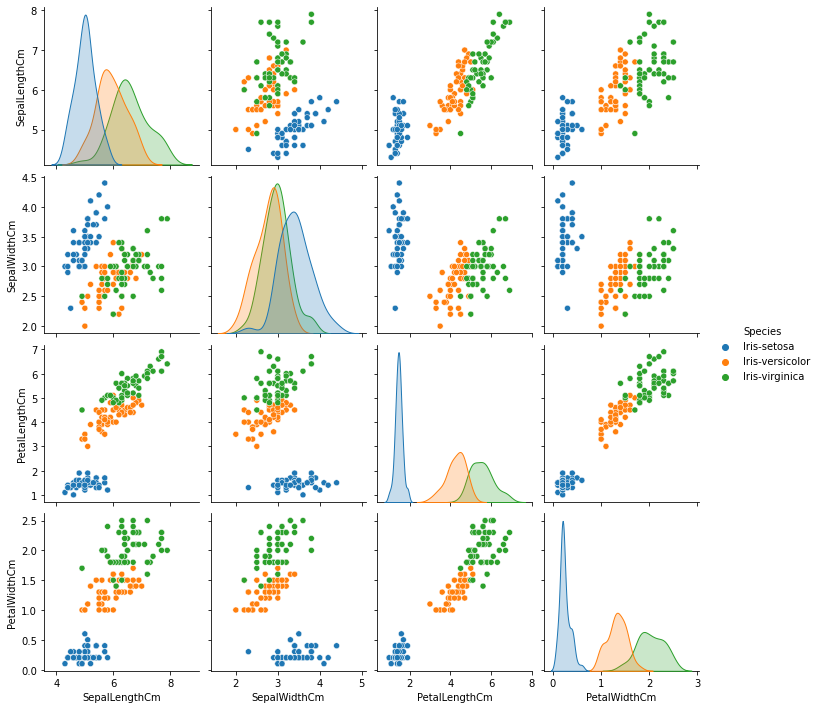

In [17]:
sns.pairplot(data,hue='Species')

# Heatmap 

## Analyzing Correlation between Feature and Target

<AxesSubplot:>

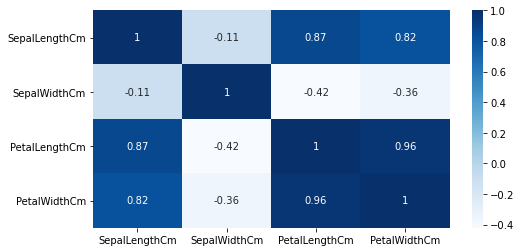

In [18]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

The plot insights that petal width and petal lenght are highly correlated, while the sepal length and sepal width are not correlated.

## Visualizing the Sepal Diamensions

In [19]:
sns.set_style("darkgrid")

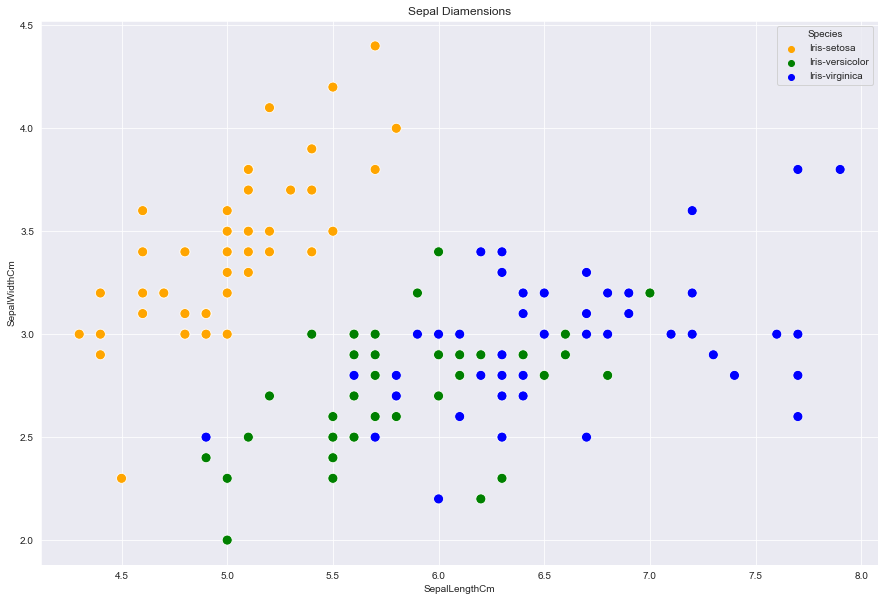

In [20]:
plt.figure(figsize=(15,10))
plt.title("Sepal Diamensions")
sns.scatterplot(x=data["SepalLengthCm"],
               y=data["SepalWidthCm"],
               hue=data["Species"],palette={'green','orange','blue'},
               s=100);

The above plot gives the information the species "blue" has small sepal length and large sepal width and where species "green" has large sepal length and small sepal width.

# Visualizing the Petal Diamensions

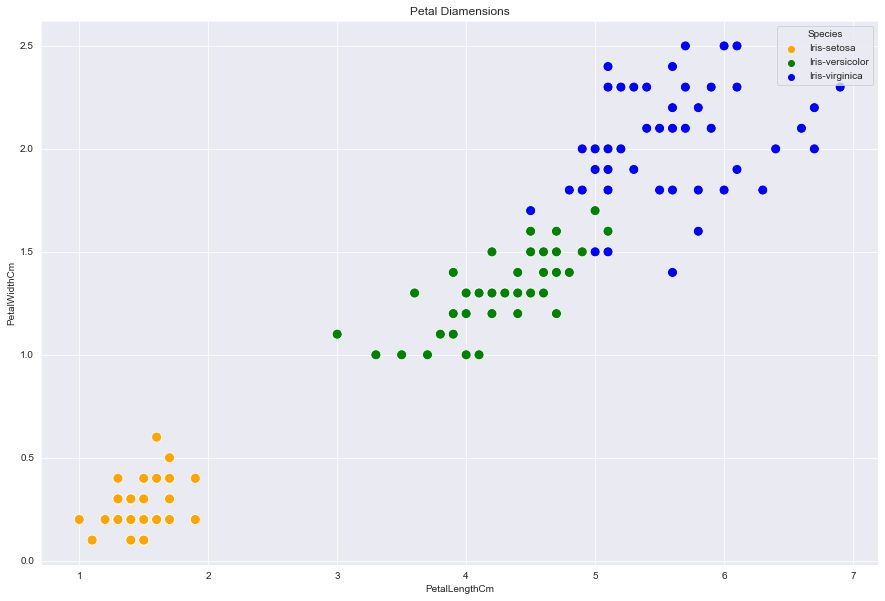

In [21]:
plt.figure(figsize=(15,10))
plt.title("Petal Diamensions")
sns.scatterplot(x=data["PetalLengthCm"],
               y=data["PetalWidthCm"],
               hue=data["Species"],palette={'green','orange','blue'},
               s=100);

Here species "blue" has small petal length and petal width while opposite holds true for species "orange".It can be observed that there is linear relationship between petal length and petal width for all species. 

## Analyzing the Distribution of Sepal and Petal Diamensions

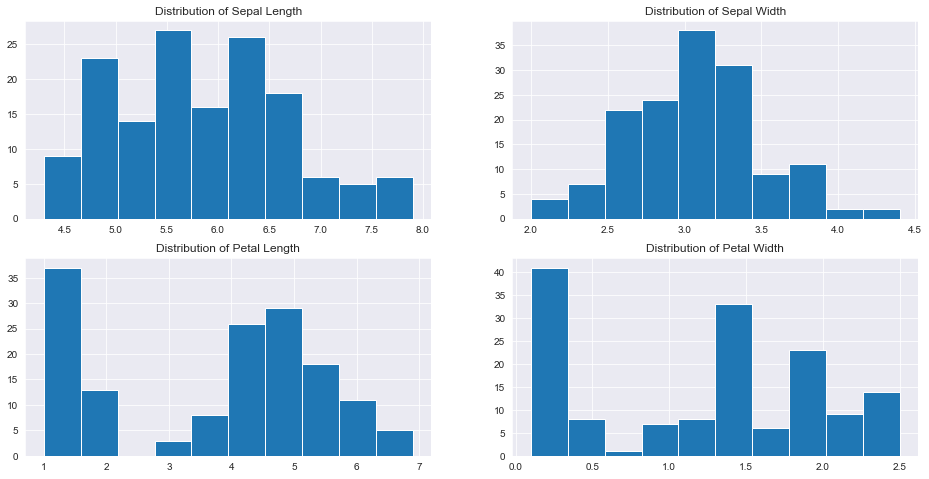

In [22]:
fig,axes=plt.subplots(2,2, figsize=(16,8))

#plot for sepal length
axes[0,0].set_title("Distribution of Sepal Length")
axes[0,0].hist(data["SepalLengthCm"]);

#plot for sepal width
axes[0,1].set_title("Distribution of Sepal Width")
axes[0,1].hist(data["SepalWidthCm"]);

#plot for petal length
axes[1,0].set_title("Distribution of Petal Length")
axes[1,0].hist(data["PetalLengthCm"]);

#plot for petal width
axes[1,1].set_title("Distribution of Petal Width")
axes[1,1].hist(data["PetalWidthCm"]);

It is observed that sepal width follows Normal Distribution, while sepal length is lightly right skewed.

# Splitting the Data into Training and Testing Dataset

In [23]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(data,test_size=0.2)

In [24]:
train.shape, test.shape

((120, 5), (30, 5))

In [25]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [26]:
train_x=train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y=train.Species
train_x=test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y=test.Species

In [27]:
from sklearn.tree import DecisionTreeClassifier

## Fitting the Model

In [28]:
X=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y=data.Species

In [29]:
dtree=DecisionTreeClassifier()
dtree.fit(X,Y)
print("Decision Tree Classifier is Created")

Decision Tree Classifier is Created


# Visualization of Decision Tree

In [30]:
#method-1
#Importing necessary libraries for graph viz
import six
import sys
sys.modules['sklearn.externals.six']=six
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

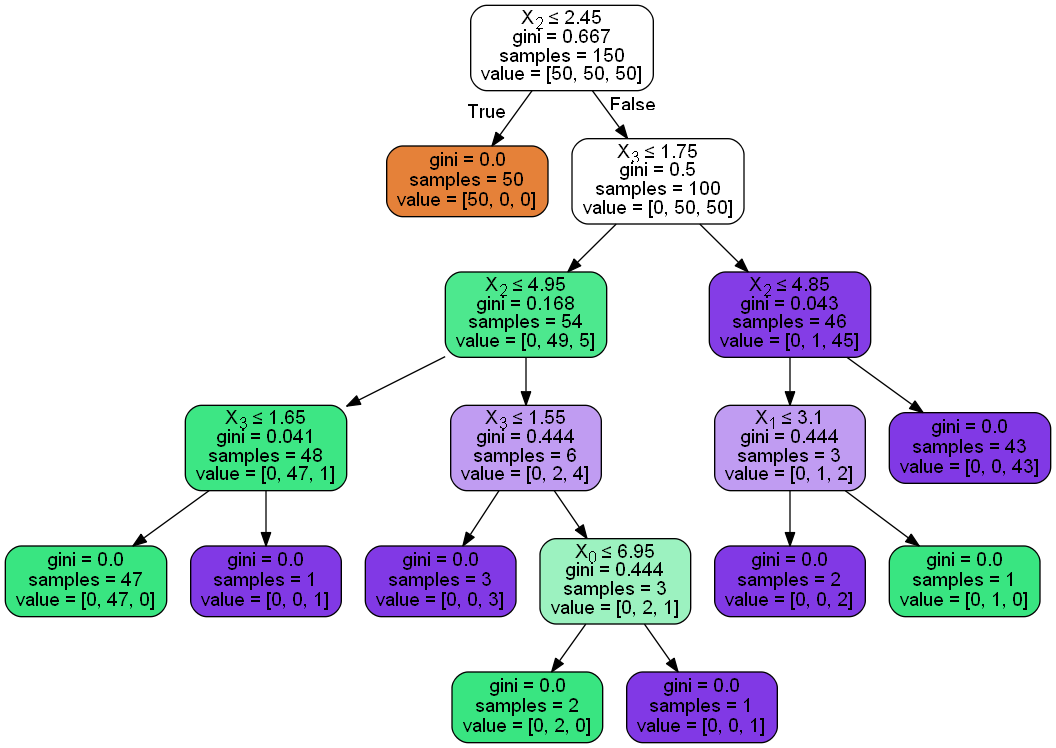

In [31]:
#Visualize the graph
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())